In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')


In [11]:

url="https://raw.githubusercontent.com/MontyVasita18/Energy_Consumption_ML_Model/refs/heads/main/train_energy_data.csv"
df=pd.read_csv(url)

df.sample(frac=1)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
17,Industrial,38446,97,20,23.99,Weekend,5672.37
230,Industrial,24660,32,5,23.67,Weekend,4034.64
282,Residential,22276,71,22,11.22,Weekday,3757.72
233,Residential,11803,32,1,27.57,Weekday,2342.32
226,Residential,15858,30,2,29.99,Weekend,2482.94
...,...,...,...,...,...,...,...
571,Commercial,12842,60,39,25.63,Weekend,3893.95
281,Commercial,26111,26,49,15.85,Weekday,4516.31
618,Commercial,41901,23,26,33.56,Weekend,4677.23
942,Residential,48785,84,6,20.48,Weekend,4796.83


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [13]:
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [24]:
from collections import OrderedDict

stats=[]
for i in df.columns:
    if df[i].dtype!="object":
        numerical_stats=OrderedDict({
            'Features':i,
            'mean':df[i].mean(),
            'median':df[i].median(),
            '25%':df[i].quantile(0.25),
            '75%':df[i].quantile(0.75),
            'Kurtosis':df[i].kurt(),
            'Skewness':df[i].skew(),
            'Standard Deviation':df[i].std()
        })
        stats.append(numerical_stats)
        report=pd.DataFrame(stats)
report
        


,Features,mean,median,25%,75%,Kurtosis,Skewness,Standard Deviation
0,Square Footage,25462.38800,25477.000,13169.7500,37446.25,-1.175406,0.009313,14294.554000
1,Number of Occupants,48.37200,47.000,22.0000,73.25,-1.241970,0.089302,29.061972
2,Appliances Used,25.60600,26.000,13.0000,38.00,-1.196605,-0.037392,14.105166
3,Average Temperature,22.61139,22.815,16.4750,28.85,-1.180404,-0.040406,7.139943
4,Energy Consumption,4166.25257,4175.730,3509.4825,4863.85,-0.575224,-0.046241,933.313064


In [25]:
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


<Axes: >

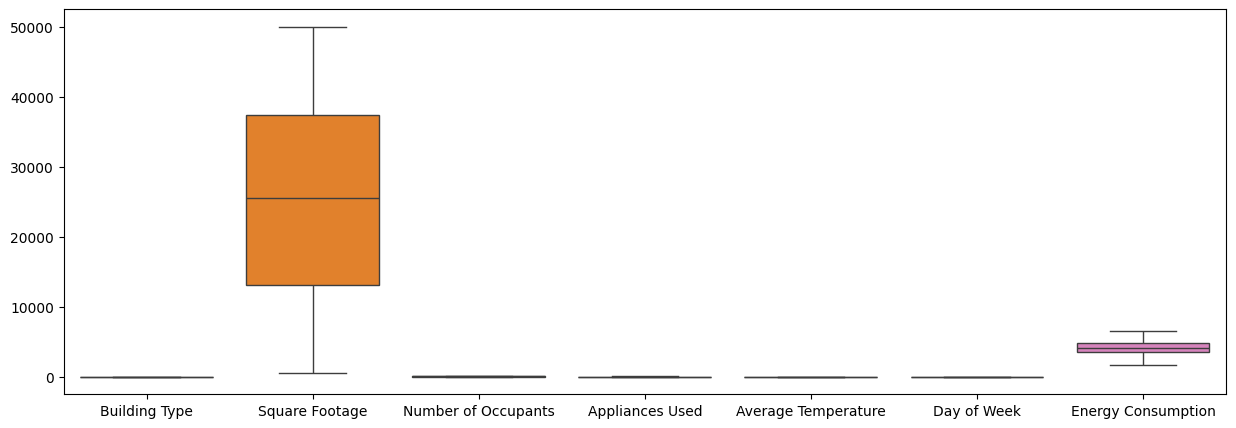

In [45]:
# Checking outliers using Box Plot
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [32]:
# Using Lebel Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["Building Type"]=le.fit_transform(df['Building Type'])
df["Day of Week"]=le.fit_transform(df['Day of Week'])




In [34]:
X=df.drop(columns='Energy Consumption')
y=df['Energy Consumption']

0      2713.95
1      5744.99
2      4101.24
3      3009.14
4      3279.17
        ...   
995    3661.21
996    3546.34
997    5147.21
998    3244.98
999    3423.63
Name: Energy Consumption, Length: 1000, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.80,random_state=42)

                          
                                    As Our Data Is Normaly We Standard Scaler 

In [47]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Algorithm**

                                                 LinerRegression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Lr=LinearRegression()
Lr.fit(X_train,y_train)
y_pred_LR=Lr.predict(X_test)


r2_score_Lr=r2_score(y_pred_LR,y_test)*100

r2_score_Lr



81.22499080180118

                                                Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

Dt=DecisionTreeRegressor()
Dt.fit(X_train,y_train)
y_pred_Dt=Dt.predict(X_test)


r2_score_Dt=r2_score(y_pred_Dt,y_test)*100
r2_score_Dt

92.65625966094123

                                                Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor()
Rf.fit(X_train,y_train)
y_pred_Rf=Rf.predict(X_test)

r2_score_Rf=r2_score(y_pred_Rf,y_test)*100

r2_score_Rf

97.3326277232487